In [39]:
import numpy as np

import pandas as pd
from pandas import read_csv

from matplotlib import pyplot as plt

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

import seaborn as sns

# Load Data

In [40]:
df_raw = read_csv('train_easy2use.csv')

# pd.set_option('display.max_rows', df_raw.shape[0]+1)

In [41]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54074 entries, 0 to 54073
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MOFname                      54074 non-null  object 
 1   volume                       54074 non-null  float64
 2   weight                       54074 non-null  float64
 3   density                      54074 non-null  float64
 4   surface_area                 54074 non-null  float64
 5   void_fraction                54074 non-null  float64
 6   void_volume                  54074 non-null  float64
 7   CO2/N2_selectivity           54074 non-null  float64
 8   heat_adsorption_CO2          54074 non-null  float64
 9   CO2_working_capacity         54074 non-null  float64
 10  mt_linker_nAtom              54074 non-null  int64  
 11  mt_linker_nBond              54074 non-null  int64  
 12  mt_linker_nRing              54074 non-null  int64  
 13  mt_linker_nHeavy

In [42]:
df = df_raw[df_raw['surface_area'] > 0]
df

,MOFname,volume,weight,density,surface_area,void_fraction,void_volume,CO2/N2_selectivity,heat_adsorption_CO2,CO2_working_capacity,...,bcu,etb,fof,nbo,pcu,pts,rht,sra,tbo,the
0,mof_unit_298,1122.894081,739.185400,1.093110,1011.38,0.17922,0.1640,23.154877,5.680328,93.542937,...,0,0,0,0,1,0,0,0,0,0
1,mof_unit_309,1121.156365,771.222200,1.142254,908.98,0.14254,0.1248,33.153060,6.812856,204.448460,...,0,0,0,0,1,0,0,0,0,0
2,mof_unit_664,1132.690953,595.184200,0.872548,1890.74,0.28366,0.3251,11.986666,5.148416,73.375700,...,0,0,0,0,1,0,0,0,0,0
3,mof_unit_1528,1122.886509,692.191800,1.023623,1355.30,0.22398,0.2188,22.092426,6.186543,120.009000,...,0,0,0,0,1,0,0,0,0,0
4,mof_unit_1621,1124.864717,768.178500,1.133995,1140.20,0.18740,0.1653,32.646398,6.320088,160.814437,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54069,mof_unit_66223,103004.062240,20852.791680,0.336170,4865.61,0.71205,2.1181,3.875471,3.123313,-2.267491,...,0,0,0,0,0,0,0,0,1,0
54070,mof_unit_40001,29171.241696,6396.387900,0.364107,4568.11,0.64114,1.7609,5.867852,4.297833,55.146792,...,0,0,0,0,0,0,0,0,0,1
54071,mof_unit_64137,223964.854408,22595.928960,0.167533,6129.19,0.83977,5.0126,2.304666,2.530420,-18.345287,...,0,0,0,0,0,0,0,0,1,0
54072,mof_unit_30261,44655.137268,7983.159994,0.296861,2498.74,0.72919,2.4563,7.616618,4.595563,42.799232,...,0,0,0,0,0,0,0,0,0,1


In [43]:
df.max()

MOFname         mof_unit_9997
volume                 223965
weight                22595.9
density               2.98018
surface_area          7083.53
                    ...      
pts                         1
rht                         1
sra                         1
tbo                         1
the                         1
Length: 77, dtype: object

In [45]:
df_train = df.drop(['MOFname'], axis = 1 )

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54074 entries, 0 to 54073
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volume                       54074 non-null  float64
 1   weight                       54074 non-null  float64
 2   density                      54074 non-null  float64
 3   surface_area                 54074 non-null  float64
 4   void_fraction                54074 non-null  float64
 5   void_volume                  54074 non-null  float64
 6   CO2/N2_selectivity           54074 non-null  float64
 7   heat_adsorption_CO2          54074 non-null  float64
 8   CO2_working_capacity         54074 non-null  float64
 9   mt_linker_nAtom              54074 non-null  int64  
 10  mt_linker_nBond              54074 non-null  int64  
 11  mt_linker_nRing              54074 non-null  int64  
 12  mt_linker_nHeavyAtom         54074 non-null  int64  
 13  mt_linker_cLogP 

In [47]:
X = df_train.drop('CO2_working_capacity', axis = 1)
y = df_train['CO2_working_capacity'].values

In [48]:
y

array([ 93.54293702, 204.44846028,  73.37570022, ..., -18.34528694,
        42.79923153,  51.37165667])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43259 entries, 23912 to 15795
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volume                       43259 non-null  float64
 1   weight                       43259 non-null  float64
 2   density                      43259 non-null  float64
 3   surface_area                 43259 non-null  float64
 4   void_fraction                43259 non-null  float64
 5   void_volume                  43259 non-null  float64
 6   CO2/N2_selectivity           43259 non-null  float64
 7   heat_adsorption_CO2          43259 non-null  float64
 8   mt_linker_nAtom              43259 non-null  int64  
 9   mt_linker_nBond              43259 non-null  int64  
 10  mt_linker_nRing              43259 non-null  int64  
 11  mt_linker_nHeavyAtom         43259 non-null  int64  
 12  mt_linker_cLogP              43259 non-null  float64
 13  mt_linker_MW

# FFNN Model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error

In [18]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[[ 3.84796240e+03  1.66891882e+03  8.96391809e-01  2.11383350e+03
   3.08043003e-01  4.58454311e-01  2.14542522e+01  5.62384129e+00
   1.65617046e+01  1.90364189e+01  4.69255161e+00  1.65617046e+01
  -3.72884065e-01  3.53328705e+02  2.22427845e-01  9.08186018e-01
   1.86548862e+01  3.81516367e-01  1.01394901e+01  1.10716753e+01
   1.98210585e+00  1.01394901e+01  2.27511334e+00  1.28439026e+02
   3.75783026e-01  6.96589887e-01  7.76214898e-01  1.53669834e+00
   3.22245419e-01  1.88585326e-01  9.02416992e+00  1.48866005e+01
   1.71507339e+01  3.49691749e+00  1.48866005e+01  2.91238213e+00
   1.89769135e+02  5.63073218e-01  5.61248839e-01  7.83773959e-01
   4.41577005e+00  6.67675912e-01  4.10457760e-01  1.16568365e+01
   7.56836906e-02  6.84712753e-02  6.98814318e-02  1.35000572e-01
   8.82590860e-02  1.03839733e-01  1.01620510e-01  7.12221116e-02
   8.97847489e-02  7.76486099e-02  6.08197339e-02  5.59883565e-02
   8.39362592e-02  1.01782300e-01  4.28350419e-02  7.15690181e-02
   9.11255

In [19]:
def build_and_compile_model(norm):
  model = Sequential([
      norm,
      Dense(32, activation='relu'),
      Dense(32, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1, activation='linear')
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam())
  return model

In [20]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary() 

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 75)                151       
_________________________________________________________________
dense (Dense)                (None, 32)                2432      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,728
Trainable params: 4,577
Non-trainable params: 151
_________________________________________________________________


In [21]:
X_train

,volume,weight,density,surface_area,void_fraction,void_volume,CO2/N2_selectivity,heat_adsorption_CO2,mt_linker_nAtom,mt_linker_nBond,...,bcu,etb,fof,nbo,pcu,pts,rht,sra,tbo,the
23912,4358.448323,1697.278320,0.646652,2453.65,0.35008,0.5414,44.897834,6.181376,16,17,...,0,0,0,0,0,0,0,1,0,0
52440,2592.902174,1856.641576,1.189026,759.56,0.16963,0.1427,26.315827,6.631387,12,4,...,0,1,0,0,0,0,0,0,0,0
45289,22137.094351,7428.852800,0.557251,3557.67,0.56510,1.0141,5.829337,3.325592,14,16,...,0,0,0,1,0,0,0,0,0,0
5815,1608.146393,870.849280,0.899222,1733.28,0.24833,0.2762,15.647866,5.852022,14,17,...,0,0,0,0,1,0,0,0,0,0
7,1124.664182,685.606400,1.012282,1556.38,0.23717,0.2343,18.279342,5.776545,14,16,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2270.239172,1342.016120,0.981602,1697.41,0.24698,0.2516,19.235637,5.935073,14,17,...,0,0,0,0,1,0,0,0,0,0
44732,1125.043158,747.660360,1.103531,951.46,0.16072,0.1456,36.509494,6.786240,14,17,...,0,0,0,0,1,0,0,0,0,0
38158,1958.630275,1067.718280,0.905219,1452.90,0.23965,0.2647,24.759979,5.598155,14,16,...,0,0,0,0,1,0,0,0,0,0
860,5253.910906,2616.401600,0.826934,1784.69,0.25114,0.3037,18.548991,5.720262,44,56,...,1,0,0,0,0,0,0,0,0,0


In [22]:
history = dnn_model.fit(X_train,  y_train, validation_split = 0.2, epochs=20, batch_size=32 ,callbacks=[monitor])

Epoch 1/20
1082/1082 [==============================] - 4s 3ms/step - loss: 33.6299 - val_loss: 23.2074
Epoch 2/20
1082/1082 [==============================] - 3s 3ms/step - loss: 22.1339 - val_loss: 21.9917
Epoch 3/20
1082/1082 [==============================] - 3s 3ms/step - loss: 21.1190 - val_loss: 21.2797
Epoch 4/20
1082/1082 [==============================] - 3s 3ms/step - loss: 20.4401 - val_loss: 20.6497
Epoch 5/20
1082/1082 [==============================] - 3s 3ms/step - loss: 20.0251 - val_loss: 20.0235
Epoch 6/20
1082/1082 [==============================] - 3s 3ms/step - loss: 19.6976 - val_loss: 20.0690
Epoch 7/20
1082/1082 [==============================] - 3s 3ms/step - loss: 19.3643 - val_loss: 19.6548
Epoch 8/20
1082/1082 [==============================] - 3s 3ms/step - loss: 19.1216 - val_loss: 19.1621
Epoch 9/20
1082/1082 [==============================] - 3s 3ms/step - loss: 18.8787 - val_loss: 19.1441
Epoch 10/20
1082/1082 [==============================] - 3s 3ms/

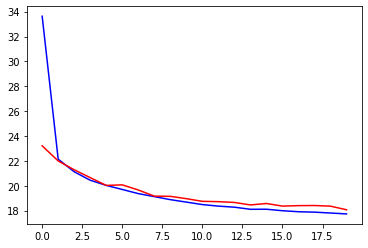

In [23]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.plot(loss_values, 'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')

In [24]:
y_train_pred = dnn_model.predict(X_train)
y_test_pred = dnn_model.predict(X_test)

In [25]:
log_mae = np.log10(mean_absolute_error(y_test_pred, y_test))
log_mae

1.262136955716216

In [26]:
num = y_test.size
real = y_test[:num]
predicted = [y_test_pred[i][0] for i in range(0,num)]
  
dict = { 
    'real': real,
    'predicted': predicted
}
    
predict = pd.DataFrame(dict)

predict

,real,predicted
0,60.376913,67.901810
1,119.025969,104.089073
2,83.535171,77.644363
3,180.985800,131.100372
4,74.578118,68.999619
...,...,...
10810,72.541568,65.455421
10811,75.438002,69.979652
10812,76.132644,68.315247
10813,57.702012,82.285042


In [38]:
dnn_model.evaluate(X_test, y_test)

338/338 [==============================] - 0s 1ms/step - loss: 18.2868


18.286775588989258

# Submission

In [32]:
df_test_raw = read_csv('test_easy2use.csv')

In [33]:
df_test_raw

,MOFname,volume,weight,density,surface_area,void_fraction,void_volume,CO2/N2_selectivity,heat_adsorption_CO2,mt_linker_nAtom,...,bcu,etb,fof,nbo,pcu,pts,rht,sra,tbo,the
0,mof_unit_68614,1208.301332,797.70936,1.096273,586.54,0.11392,0.1039,36.639791,7.005640,14,...,0,0,0,0,1,0,0,0,0,0
1,mof_unit_68615,4126.414623,3733.65779,1.502488,852.49,0.21367,0.1422,18.390691,5.119399,22,...,0,0,0,0,0,0,0,0,0,0
2,mof_unit_68616,1602.148373,747.21048,0.774443,3155.73,0.33883,0.4375,13.062850,5.045400,14,...,0,0,0,0,1,0,0,0,0,0
3,mof_unit_68617,2436.629312,995.80232,0.678630,3521.09,0.40464,0.5963,9.601198,5.106238,14,...,0,0,0,0,1,0,0,0,0,0
4,mof_unit_68618,3123.418006,1337.53800,0.711091,2678.46,0.38959,0.5479,12.974954,5.287639,14,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,mof_unit_85609,32660.944605,4723.68288,0.240160,5720.14,0.77614,3.2318,4.536626,3.146698,14,...,0,0,0,1,0,0,0,0,0,0
16996,mof_unit_85610,5070.998617,1499.13262,0.490903,4017.28,0.59192,1.2058,6.745508,3.658871,14,...,0,0,0,1,0,0,0,0,0,0
16997,mof_unit_85611,4669.804446,1322.04892,0.470109,4288.76,0.54950,1.1689,4.666206,3.593052,14,...,0,0,0,0,1,0,0,0,0,0
16998,mof_unit_85612,4682.120862,1213.51148,0.430379,4331.86,0.60643,1.4091,4.823305,3.454497,14,...,0,0,0,0,1,0,0,0,0,0


In [34]:
df_test = df_test_raw.drop(['MOFname'], axis = 1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volume                       17000 non-null  float64
 1   weight                       17000 non-null  float64
 2   density                      17000 non-null  float64
 3   surface_area                 17000 non-null  float64
 4   void_fraction                17000 non-null  float64
 5   void_volume                  17000 non-null  float64
 6   CO2/N2_selectivity           17000 non-null  float64
 7   heat_adsorption_CO2          17000 non-null  float64
 8   mt_linker_nAtom              17000 non-null  int64  
 9   mt_linker_nBond              17000 non-null  int64  
 10  mt_linker_nRing              17000 non-null  int64  
 11  mt_linker_nHeavyAtom         17000 non-null  int64  
 12  mt_linker_cLogP              17000 non-null  float64
 13  mt_linker_MW    

In [35]:
y_submission = dnn_model.predict(df_test)

In [36]:
y_submission

array([[ 2.0850272e+02],
       [ 6.0965401e+01],
       [ 7.0237556e+01],
       ...,
       [ 2.1066024e+00],
       [-9.2873394e-02],
       [-4.0277696e+00]], dtype=float32)

In [37]:
submission = pd.DataFrame({
    "id": [str(i) for i in range(68614,85613 + 1)],
    "CO2_working_capacity [mL/g]": y_submission.T[0]
    })

submission.to_csv("submission_Dnn_Dense32.csv", index=False)